In [2]:
# Read Captions
def readcaptions(path):
    f = open(path)
    text = f.read()
    f.close()
    captions = {}
    for line in text.split("\n")[:-1]:
        pid , cap = line.split("\t")
        pid = pid[:-2]
        if(captions.get(pid)==None):
            captions[pid] = [cap]
        else:
            captions[pid].append(cap)
            
    return captions

captions = readcaptions("../flickr8k/Flickr_Data/Flickr_Data/Flickr_TextData/Flickr8k.token.txt")


In [3]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

### Show data 

In [4]:
def show_data(pid):
    path = "../flickr8k/Flickr_Data/Flickr_Data/Images/"+pid 
    img = cv.imread(path)
    plt.imshow(img)
    plt.axis("off")
    plt.show()
    for i ,cap in enumerate(captions[pid]):
        print(i+ 1 , cap)

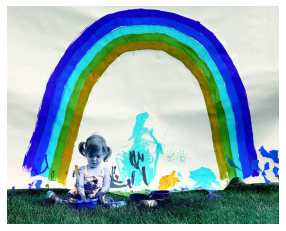

1 A little girl covered in paint sits in front of a painted rainbow with her hands in a bowl .
2 A little girl is sitting in front of a large painted rainbow .
3 A small girl in the grass plays with fingerpaints in front of a white canvas with a rainbow on it .
4 There is a girl with pigtails sitting in front of a rainbow painting .
5 Young girl with pigtails painting outside in the grass .


In [5]:
show_data(list(captions.keys())[2])

In [6]:
import re

def clean_text(text):
    text = text.lower()
    text = re.sub("[^a-z]+" , " " , text)
    text = text.split()
    
    #text = [ word for word in text if len(word) > 1]
    text = " ".join(text)

    return text
    
    return text
clean_text("My phone number is 94669#####")

'my phone number is'

### ALL Caption cleaning

In [7]:
for key , cap in captions.items():
    for i in range(len(cap)):
        captions[key][i] = clean_text(cap[i])

## Creating Vocab

In [9]:
vocab = set()
for key in captions.keys():
    for line in captions[key]:
        vocab.update(line.split())
        
len(vocab)

8441

In [10]:
#all words
total_words = []

for key in captions.keys():
    for line in captions[key]:
        total_words.extend(line.split())
        
len(total_words)

437466

In [11]:
#Word frequency

word_freq ={}
for word in total_words:
    if(word_freq.get(word) == None):
        word_freq[word] = 1
    else:
        word_freq[word] += 1
        
word_freq

{'a': 62995,
 'child': 1545,
 'in': 18987,
 'pink': 739,
 'dress': 348,
 'is': 9345,
 'climbing': 507,
 'up': 1302,
 'set': 109,
 'of': 6723,
 'stairs': 109,
 'an': 2432,
 'entry': 1,
 'way': 53,
 'girl': 3328,
 'going': 149,
 'into': 1074,
 'wooden': 284,
 'building': 511,
 'little': 1768,
 'playhouse': 6,
 'the': 18420,
 'to': 3176,
 'her': 1178,
 'cabin': 4,
 'black': 3848,
 'dog': 8138,
 'and': 8863,
 'spotted': 38,
 'are': 3505,
 'fighting': 133,
 'tri': 14,
 'colored': 221,
 'playing': 2008,
 'with': 7765,
 'each': 430,
 'other': 773,
 'on': 10746,
 'road': 398,
 'white': 3959,
 'brown': 2578,
 'spots': 29,
 'staring': 57,
 'at': 2916,
 'street': 944,
 'two': 5643,
 'dogs': 2125,
 'different': 46,
 'breeds': 5,
 'looking': 744,
 'pavement': 48,
 'moving': 41,
 'toward': 146,
 'covered': 372,
 'paint': 62,
 'sits': 577,
 'front': 1386,
 'painted': 64,
 'rainbow': 22,
 'hands': 246,
 'bowl': 30,
 'sitting': 1368,
 'large': 1237,
 'small': 1278,
 'grass': 1622,
 'plays': 526,
 'fing

In [12]:
new_vocab = set()
for vword in vocab:
    if(word_freq[vword] > 10):
        new_vocab.add(vword)
    
len(new_vocab)


1850